# Real Time Data Processing for Weather Monitoring

# Importing Libraries

In [4]:
import requests
import schedule
import time
from datetime import datetime
import matplotlib.pyplot as plt

# Global variables to store weather data

In [5]:
weather_data = []
daily_summary = {}

# Function to convert temperature from Kelvin to Celsius

In [6]:
def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

# Function to fetch weather data from OpenWeatherMap API

In [7]:
def fetch_weather_data(api_key, cities):
    global weather_data
    for city in cities:
        try:
            url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            response = requests.get(url)
            data = response.json()
            if response.status_code == 200:
                weather_info = {
                    "city": city,
                    "temp": kelvin_to_celsius(data['main']['temp']),
                    "feels_like": kelvin_to_celsius(data['main']['feels_like']),
                    "main": data['weather'][0]['main'],
                    "timestamp": datetime.now()
                }
                weather_data.append(weather_info)
                print(f"Weather data for {city}: {weather_info}")
            else:
                print(f"Failed to retrieve data for {city}. Error: {data.get('message', 'Unknown error')}")
        except Exception as e:
            print(f"An error occurred: {e}")
    
    # After fetching all data, calculate daily summary and visualize it
    calculate_daily_summary()
    visualize_daily_summary()

# Function to calculate daily aggregates

In [8]:
def calculate_daily_summary():
    global weather_data, daily_summary
    
    # Group data by city
    cities = list(set([entry['city'] for entry in weather_data]))
    for city in cities:
        city_data = [entry for entry in weather_data if entry['city'] == city]
        
        # Calculate daily aggregate metrics
        avg_temp = sum([entry['temp'] for entry in city_data]) / len(city_data)
        max_temp = max([entry['temp'] for entry in city_data])
        min_temp = min([entry['temp'] for entry in city_data])
        dominant_weather = max(set([entry['main'] for entry in city_data]), key=[entry['main'] for entry in city_data].count)
        
        daily_summary[city] = {
            "average_temp": avg_temp,
            "max_temp": max_temp,
            "min_temp": min_temp,
            "dominant_weather": dominant_weather,
            "last_updated": datetime.now()
        }
        print(f"Daily summary for {city}: {daily_summary[city]}")

# Function to visualize data

In [9]:
def visualize_daily_summary():
    if not daily_summary:
        print("No data available to visualize.")
        return
    
    cities = list(daily_summary.keys())
    avg_temps = [daily_summary[city]['average_temp'] for city in cities]
    max_temps = [daily_summary[city]['max_temp'] for city in cities]
    min_temps = [daily_summary[city]['min_temp'] for city in cities]

    plt.figure(figsize=(10, 5))
    bar_width = 0.25
    x = range(len(cities))

    plt.bar(x, avg_temps, width=bar_width, color='blue', label='Average Temp')
    plt.bar([p + bar_width for p in x], max_temps, width=bar_width, color='red', alpha=0.5, label='Max Temp')
    plt.bar([p + bar_width*2 for p in x], min_temps, width=bar_width, color='green', alpha=0.5, label='Min Temp')

    plt.xlabel('Cities')
    plt.ylabel('Temperature (°C)')
    plt.title('Daily Weather Summary')
    plt.xticks([p + bar_width for p in x], cities)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to schedule tasks

In [10]:
def schedule_tasks(api_key, cities, interval=5):
    # Schedule data fetch every 'interval' minutes
    schedule.every(interval).minutes.do(fetch_weather_data, api_key=api_key, cities=cities)
    
    while True:
        schedule.run_pending()
        time.sleep(1)

# Main function to start the weather monitoring system

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 1, 45, 634704)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 1, 45, 862664)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.879999999999995, 'feels_like': 36.879999999999995, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 1, 46, 152066)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 1, 46, 403282)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 1, 46, 708255)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.

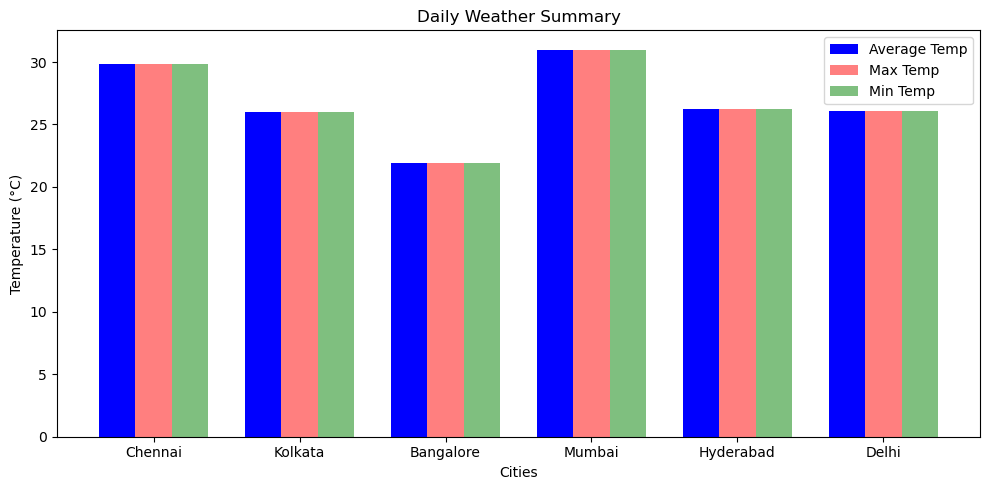

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 45, 726716)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 45, 928577)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.879999999999995, 'feels_like': 36.879999999999995, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 46, 215183)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 46, 504748)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 46, 719950)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.

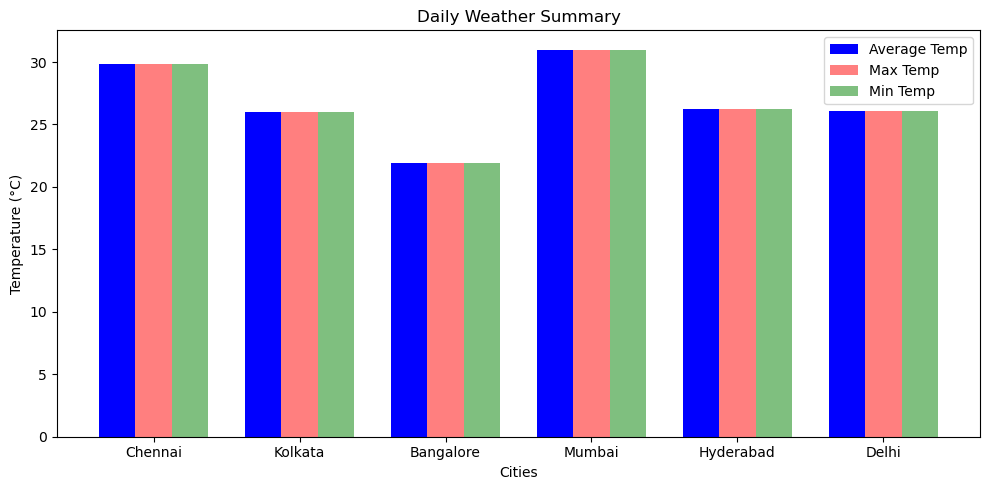

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 49, 93806)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 49, 318408)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.879999999999995, 'feels_like': 36.879999999999995, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 49, 561827)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 49, 772228)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 6, 50, 29008)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.23

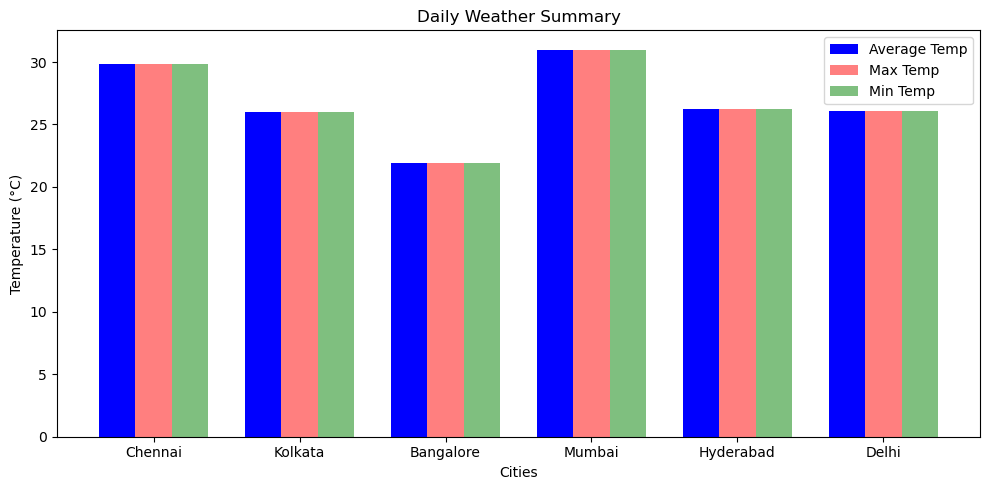

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 50, 439555)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 50, 693071)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 30.0, 'feels_like': 37.0, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 51, 7609)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 51, 324566)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 51, 600550)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230000000000018, 'feels_l

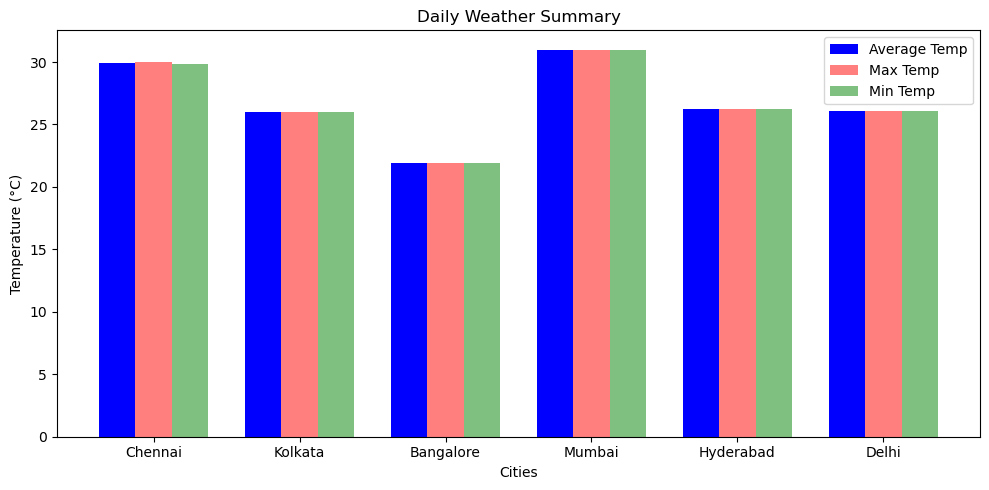

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 53, 571042)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 53, 880691)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 30.0, 'feels_like': 37.0, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 54, 160865)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 54, 455995)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 11, 54, 769238)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230000000000018, 'feels

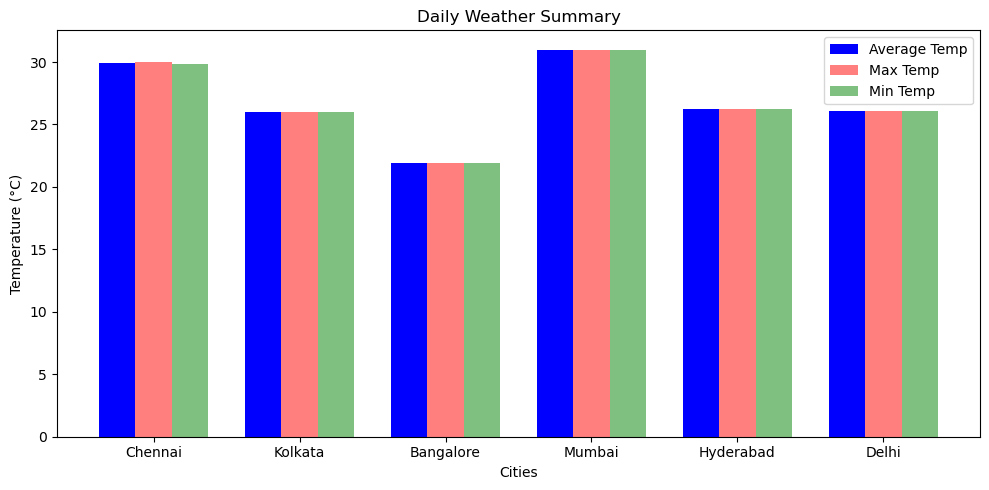

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 55, 86180)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 55, 339953)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 30.0, 'feels_like': 37.0, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 55, 577477)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 55, 801299)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 56, 99955)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230000000000018, 'feels_l

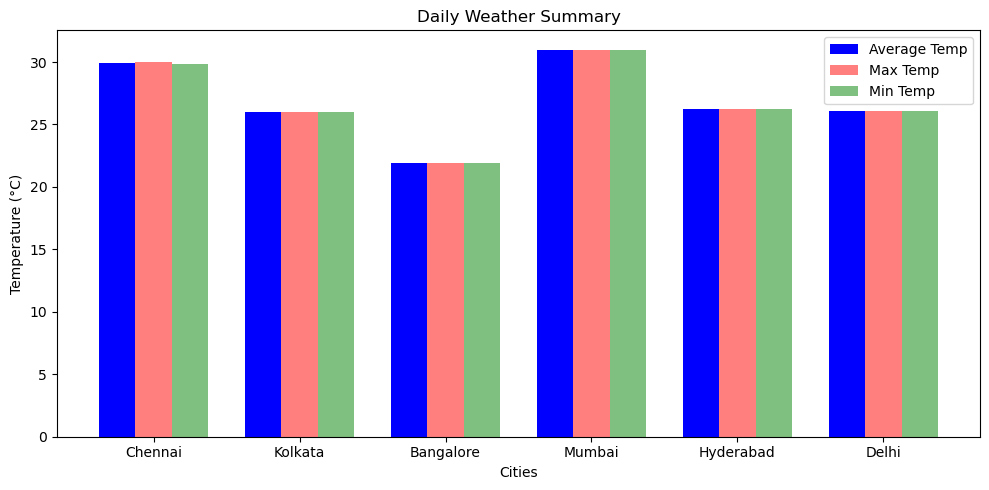

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 58, 14212)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 58, 318551)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 30.0, 'feels_like': 37.0, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 58, 599911)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 58, 838454)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 16, 59, 122437)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230000000000018, 'feels_

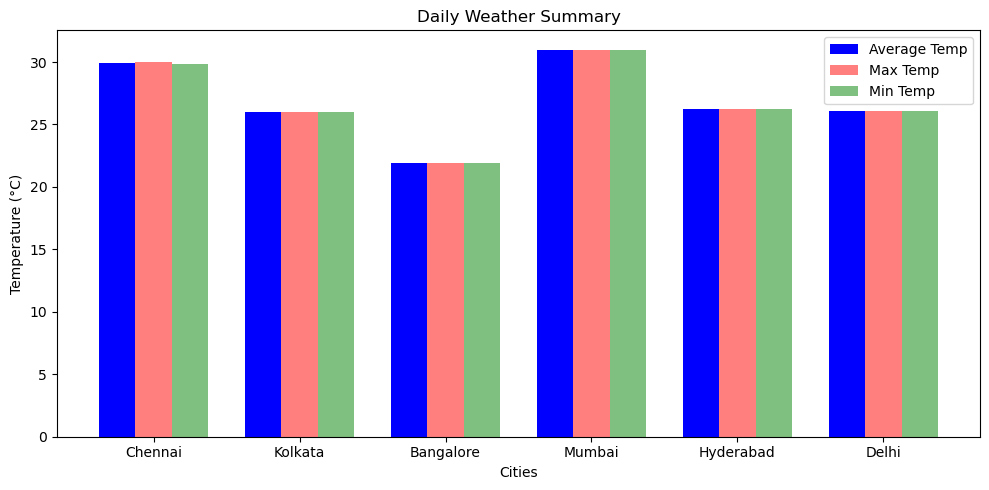

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 21, 57, 784085)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 21, 58, 114074)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.950000000000045, 'feels_like': 36.950000000000045, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 21, 58, 331870)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 21, 58, 527645)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 21, 58, 782672)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp'

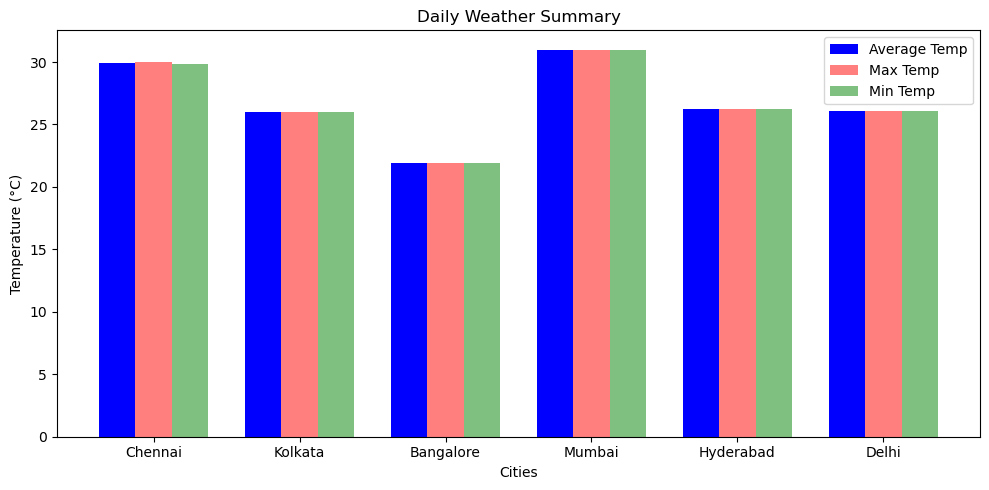

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 22, 0, 789612)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 22, 1, 28935)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.950000000000045, 'feels_like': 36.950000000000045, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 22, 1, 239962)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 22, 1, 501444)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 22, 1, 842861)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.2

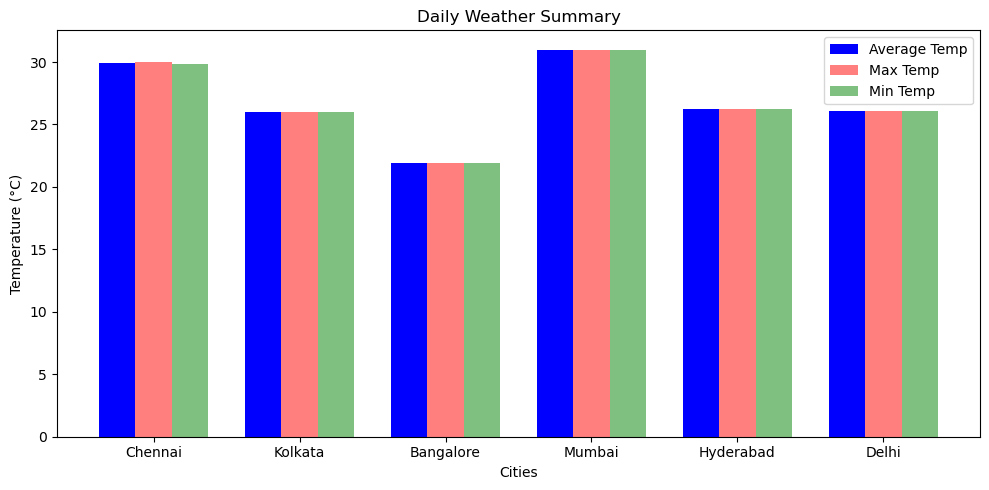

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 26, 59, 897557)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 0, 113765)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.950000000000045, 'feels_like': 36.950000000000045, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 0, 322487)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 0, 549306)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 0, 799107)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26

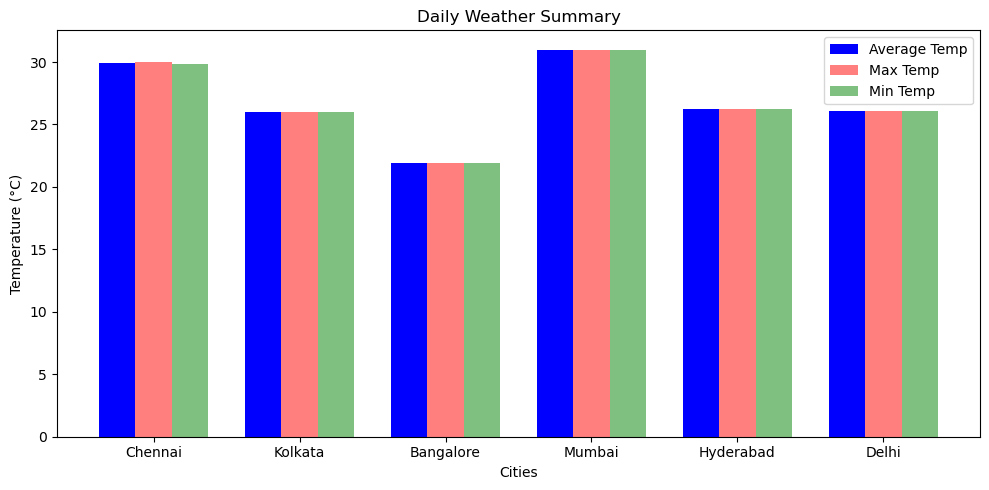

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 2, 774568)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 3, 124758)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.950000000000045, 'feels_like': 36.950000000000045, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 3, 432791)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 21.890000000000043, 'feels_like': 22.460000000000036, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 3, 737969)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 27, 3, 959195)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.

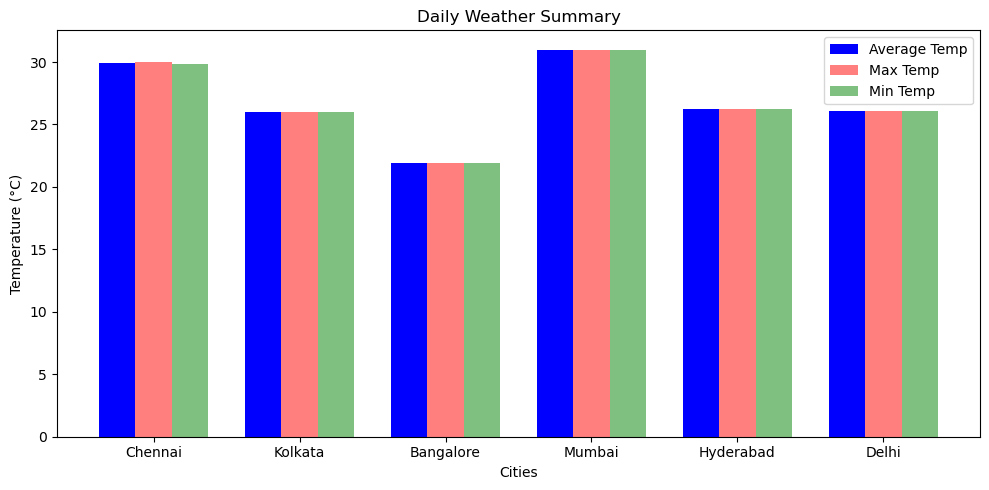

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 2, 640258)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 3, 3788)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.720000000000027, 'feels_like': 36.72000000000003, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 3, 394290)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.77000000000004, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 3, 638510)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 3, 904842)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.2300

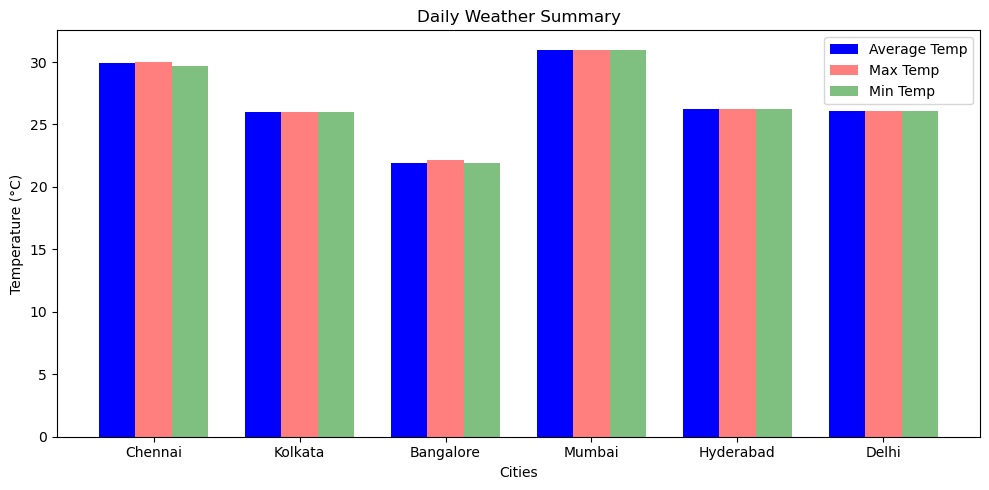

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 5, 669760)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 5, 882398)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.720000000000027, 'feels_like': 36.72000000000003, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 6, 80766)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.77000000000004, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 6, 312355)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 32, 6, 516705)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230

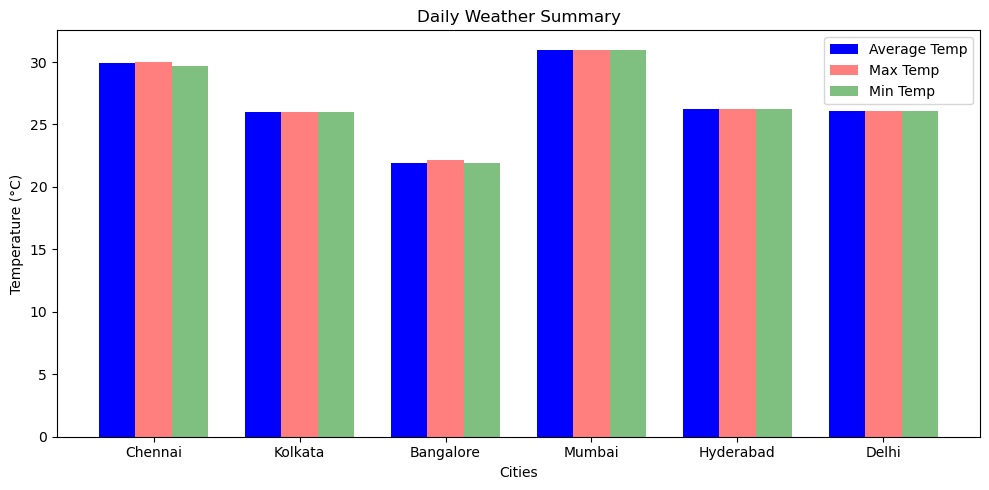

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 5, 518628)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 5, 749976)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.720000000000027, 'feels_like': 36.72000000000003, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 6, 46428)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.77000000000004, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 6, 361270)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 6, 617481)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230

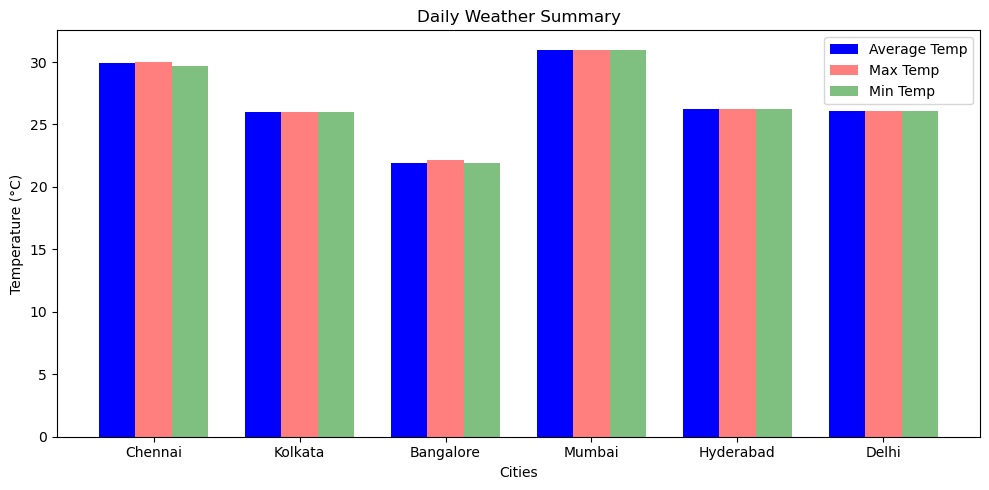

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 8, 547186)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 8, 766384)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.720000000000027, 'feels_like': 36.72000000000003, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 8, 990378)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.77000000000004, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 9, 237487)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 37, 9, 471130)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.23

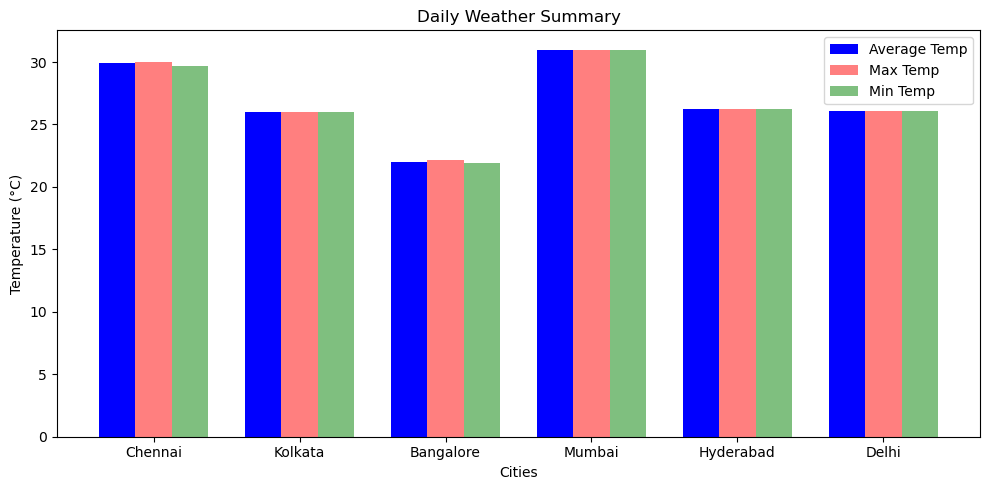

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 7, 625037)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 7, 985595)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.99000000000001, 'feels_like': 36.99000000000001, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 8, 277611)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.74000000000001, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 8, 677360)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 8, 911836)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26.230

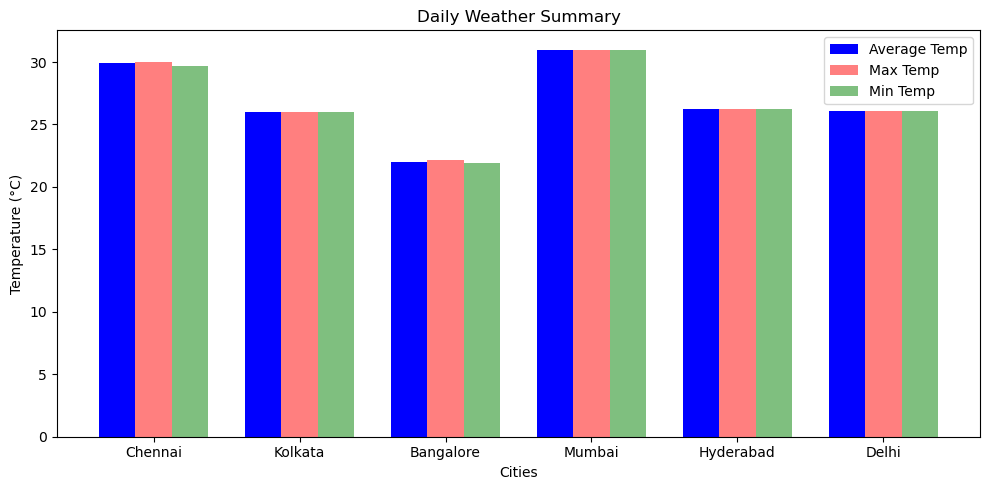

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 10, 684594)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 10, 878534)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.99000000000001, 'feels_like': 36.99000000000001, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 11, 112835)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.74000000000001, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 11, 345131)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 42, 11, 586403)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 2

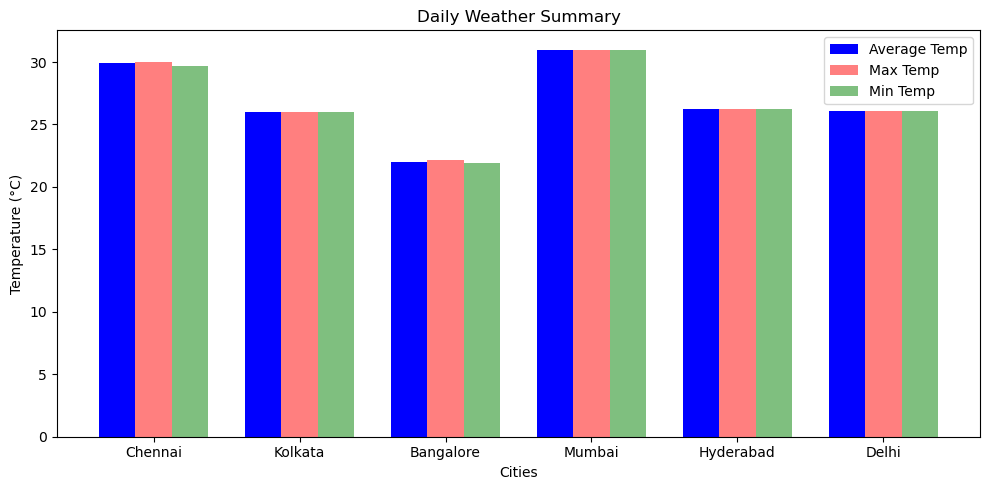

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 10, 67906)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 10, 318173)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.99000000000001, 'feels_like': 36.99000000000001, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 10, 515735)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.74000000000001, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 10, 943460)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 11, 224955)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26

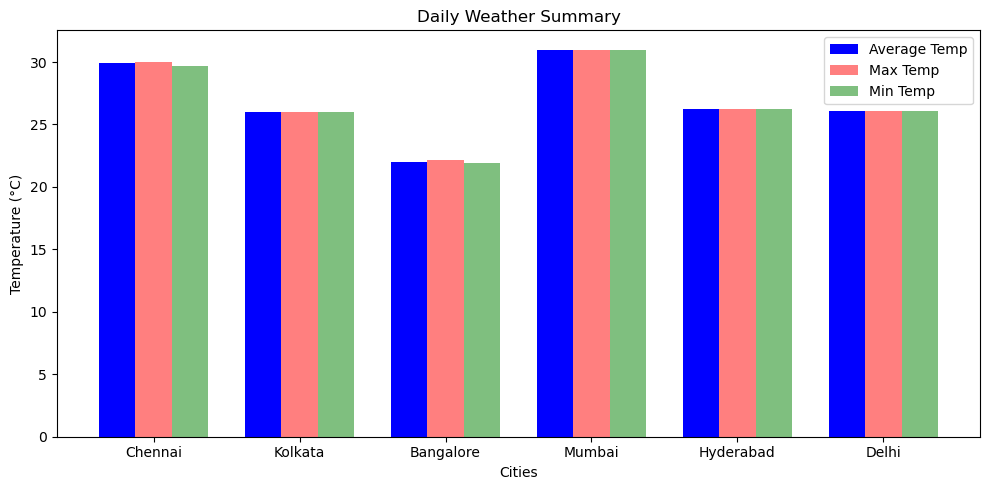

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 13, 251430)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 13, 506564)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.99000000000001, 'feels_like': 36.99000000000001, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 13, 745087)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.74000000000001, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 14, 72579)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 47, 14, 760793)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 26

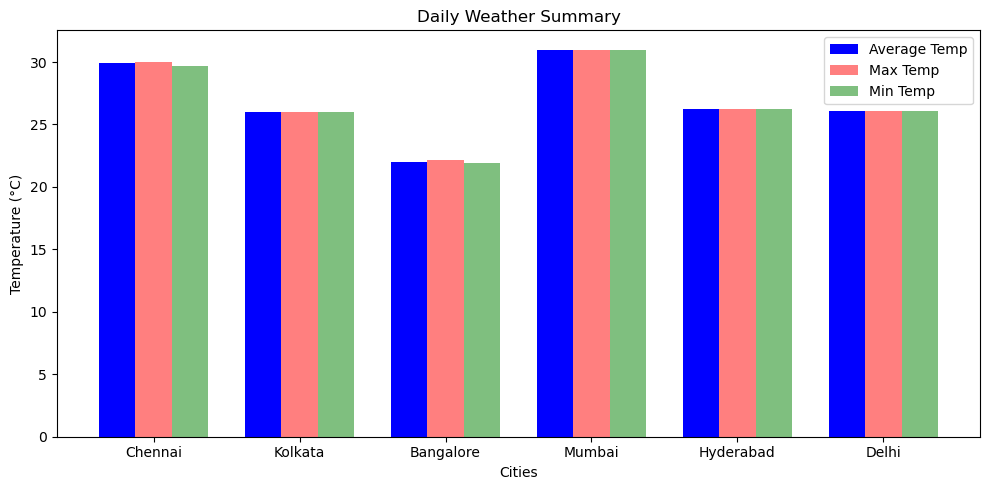

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 12, 384821)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 12, 599219)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.99000000000001, 'feels_like': 36.99000000000001, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 12, 825005)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.74000000000001, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 13, 232357)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 13, 472195)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 2

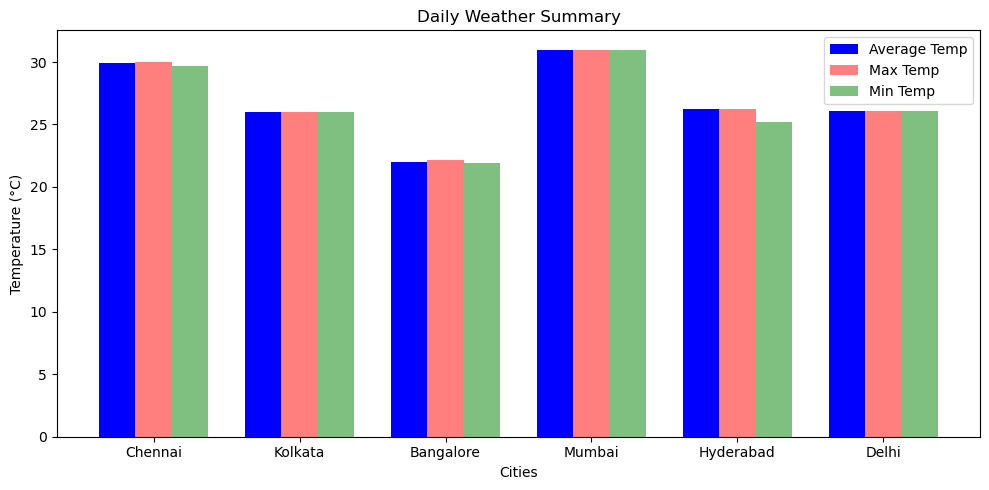

Weather data for Delhi: {'city': 'Delhi', 'temp': 26.05000000000001, 'feels_like': 26.05000000000001, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 15, 518300)}
Weather data for Mumbai: {'city': 'Mumbai', 'temp': 30.99000000000001, 'feels_like': 37.57000000000005, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 15, 750707)}
Weather data for Chennai: {'city': 'Chennai', 'temp': 29.99000000000001, 'feels_like': 36.99000000000001, 'main': 'Mist', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 15, 983629)}
Weather data for Bangalore: {'city': 'Bangalore', 'temp': 22.170000000000016, 'feels_like': 22.74000000000001, 'main': 'Rain', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 16, 223469)}
Weather data for Kolkata: {'city': 'Kolkata', 'temp': 25.970000000000027, 'feels_like': 25.970000000000027, 'main': 'Haze', 'timestamp': datetime.datetime(2024, 10, 23, 20, 52, 16, 637109)}
Weather data for Hyderabad: {'city': 'Hyderabad', 'temp': 2

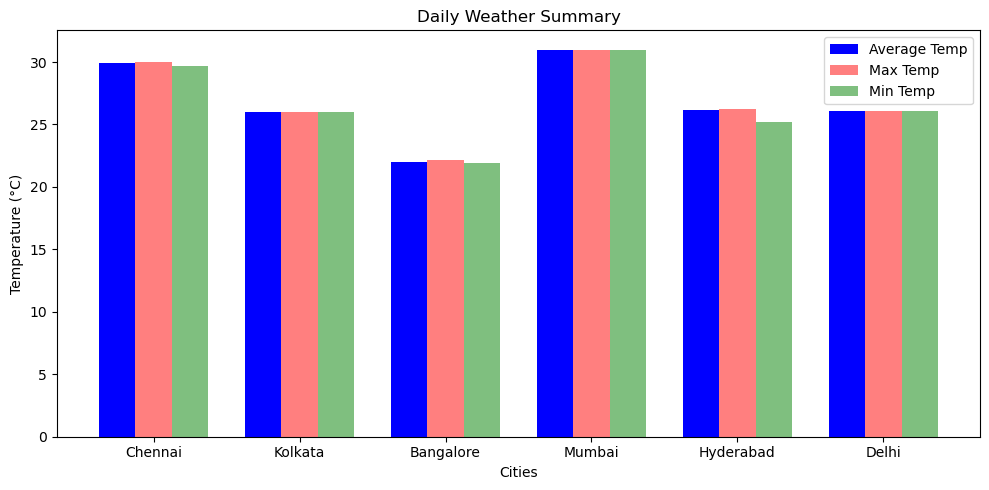

In [ ]:
if __name__ == "__main__":
    # Replace with your API key from OpenWeatherMap
    API_KEY = '4d0b73ac6ef7c3d413df5ed712ed2081'
    CITIES = ['Delhi', 'Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Hyderabad']
    
    # Start scheduling tasks
    schedule_tasks(API_KEY, CITIES, interval=5)